# **18_openpi**

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

In [ ]:
# 대상 페이지 지정
url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?'
key = 'key=f5eef3421c602c6cb7ea224104795888&targetDt='
targetDt = '20220225'
target_url = url + key + targetDt

In [ ]:
# 데이터 요청하기
response = requests.get(target_url)

In [ ]:
# 문자를 json으로 변환하기
data = json.loads(response.text)

In [ ]:
# data에서 boxOfficeResult를 꺼내고, dailyBoxOfficeList를 꺼내주세요.
items = data['boxOfficeResult']['dailyBoxOfficeList']

In [ ]:
# items의 0번째 방을 조회해주세요
item = items[0]
item

{'audiAcc': '483349',
 'audiChange': '15.6',
 'audiCnt': '21430',
 'audiInten': '2886',
 'movieCd': '20211200',
 'movieNm': '언차티드',
 'openDt': '2022-02-16',
 'rank': '1',
 'rankInten': '1',
 'rankOldAndNew': 'OLD',
 'rnum': '1',
 'salesAcc': '4696732810',
 'salesAmt': '215377920',
 'salesChange': '22.7',
 'salesInten': '39815840',
 'salesShare': '30.8',
 'scrnCnt': '1114',
 'showCnt': '3469'}

### **수신된 데이터로부터 사용할 데이터 나누기**
- rank(순위)
- movieCd(영화코드)
- movieNm(영화명)
- salesAmt(매출액)
- audiCnt(관객수)
- scrnCnt(상영스크린수)
- showCnt(상영횟수)

In [ ]:
key_list = ['rank', 'movieCd', 'movieNm', 'salesAmt', 'audiCnt', 'scrnCnt', 'showCnt']
key_list

['rank', 'movieCd', 'movieNm', 'salesAmt', 'audiCnt', 'scrnCnt', 'showCnt']

In [ ]:
# 실습하기. key_list를 이용해서 item에서 데이터를 조회해주세요.
for key in key_list:
  print(item[key])

1
20211200
언차티드
215377920
21430
1114
3469


In [ ]:
# items 전체에서 key_list의 데이터 추출하기
key_list = ['rank', 'movieCd', 'movieNm', 'salesAmt', 'audiCnt', 'scrnCnt', 'showCnt']

# 데이터 수집을 위한 임시 변수
movie_list = []

for item in items:
  temp_list = []
  for key in key_list:
    temp_list.append(item[key])
  temp_list.append(targetDt)
  movie_list.append(temp_list)

In [ ]:
key_list.append('targetDate')

In [ ]:
pd.DataFrame(movie_list, columns = key_list)

,rank,movieCd,movieNm,salesAmt,audiCnt,scrnCnt,showCnt,targetDate
0,1,20211200,언차티드,215377920,21430,1114,3469,20220225
1,2,20223278,극장판 주술회전 0,148745640,14279,778,2415,20220225
2,3,20212741,안테벨룸,72186890,7292,601,1454,20220225
3,4,20208006,인민을 위해 복무하라,64027550,6570,548,1269,20220225
4,5,20201965,해적: 도깨비 깃발,19529800,4233,371,539,20220225
5,6,20223743,나이트메어 앨리,28333770,2762,409,650,20220225
6,7,20212708,시라노,16892600,1975,164,428,20220225
7,8,20205443,나일 강의 죽음,15720100,1579,316,405,20220225
8,9,20188441,킹메이커,9862610,1504,276,343,20220225
9,10,20210028,스파이더맨: 노 웨이 홈,11626070,1370,199,223,20220225


### **숙제**
- 20170101 ~ 20171231 영화진흥원 일월박스오피스 데이터 모으기

In [ ]:
a = pd.date_range('20170101', '20171231')
b = a.strftime('%Y%m%d')
b

Index(['20170101', '20170102', '20170103', '20170104', '20170105', '20170106',
       '20170107', '20170108', '20170109', '20170110',
       ...
       '20171222', '20171223', '20171224', '20171225', '20171226', '20171227',
       '20171228', '20171229', '20171230', '20171231'],
      dtype='object', length=365)

In [ ]:
a = pd.date_range('20170101', '20170102')
b = a.strftime('%Y%m%d')
b

Index(['20170101', '20170102'], dtype='object')

In [ ]:
  # items 전체에서 key_list의 데이터 추출하기
  key_list = ['rank', 'movieCd', 'movieNm', 'salesAmt', 'audiCnt', 'scrnCnt', 'showCnt']

  # 데이터 수집을 위한 임시 변수
  movie_list = []

for targetDt in pd.date_range('20170101', '20170102'):
    # 대상 페이지 지정
    url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?'
    key = 'key=f5eef3421c602c6cb7ea224104795888&targetDt='
    targetDt = targetDt.strftime('%Y%m%d')
    target_url = url + key + targetDt

    # 데이터 요청하기
    response = requests.get(target_url)

    # 문자를 json으로 변환하기
    data = json.loads(response.text)

    # data에서 boxOfficeResult를 꺼내고, dailyBoxOfficeList를 꺼내주세요.
    items = data['boxOfficeResult']['dailyBoxOfficeList']

    for item in items:
      temp_list = []
      for key in key_list:
        temp_list.append(item[key])
      temp_list.append(targetDt)
      movie_list.append(temp_list)
key_list.append('targetDate')
pd.DataFrame(movie_list, columns = key_list)

,rank,movieCd,movieNm,salesAmt,audiCnt,scrnCnt,showCnt,targetDate
0,1,20161725,마스터,4399793100,506299,1245,5721,20170101
1,2,20163183,로그 원: 스타워즈 스토리,1612424700,173451,810,3335,20170101
2,3,20162025,씽,943975500,115152,721,1755,20170101
3,4,20144641,판도라,736891900,87966,576,1476,20170101
4,5,20167904,라라랜드,770889600,87529,590,1578,20170101
5,6,20161872,너의 이름은.,325811500,37418,275,342,20170101
6,7,20162727,루돌프와 많이있어,243890000,29910,372,581,20170101
7,8,20162183,포켓몬 더 무비 XY&Z 「볼케니온 : 기계왕국의 비밀」,154931400,19405,300,422,20170101
8,9,20152371,"당신, 거기 있어줄래요",166222000,18630,261,572,20170101
9,10,20165285,극장판 도라에몽: 신 진구의 버스 오브 재팬,28628400,3552,97,107,20170101


In [ ]:
# 실습하기. movie 데이터를 불러와주세요.
m_df = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/movie/movie.csv', encoding = 'euckr', index_col = 0)


In [ ]:
m_df.head()

,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt,scrnCnt,showCnt,targetDate
0,1,OLD,20161725,마스터,4399793100,506299,1245,5721,20170101
1,2,OLD,20163183,로그 원: 스타워즈 스토리,1612424700,173451,810,3335,20170101
2,3,OLD,20162025,씽,943975500,115152,721,1755,20170101
3,4,OLD,20144641,판도라,736891900,87966,576,1476,20170101
4,5,OLD,20167904,라라랜드,770889600,87529,590,1578,20170101


In [ ]:
# 데이터 확인
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           3650 non-null   int64 
 1   rankOldAndNew  3650 non-null   object
 2   movieCd        3650 non-null   int64 
 3   movieNm        3650 non-null   object
 4   salesAmt       3650 non-null   int64 
 5   audiCnt        3650 non-null   int64 
 6   scrnCnt        3650 non-null   int64 
 7   showCnt        3650 non-null   int64 
 8   targetDate     3650 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 285.2+ KB


In [ ]:
# targetData를 날짜로 변경하기
m_df.targetDate
m_df.targetDate = pd.to_datetime(m_df.targetDate.astype(str), format = '%Y%m%d')

In [ ]:
m_df.groupby('targetDate').sum()

,rank,movieCd,salesAmt,audiCnt,scrnCnt,showCnt
targetDate,,,,,,
20170101,55,201603916,9383458100,1079312,5247,15889
20170102,55,201328813,3271078000,429079,4666,15103
20170103,55,201601536,2665896600,354356,4704,14816
20170104,55,201589734,3958350400,524319,5010,15626
20170105,55,201589734,3581261900,472716,5240,15730
...,...,...,...,...,...,...
20171227,55,201720762,6016724800,989145,4855,16365
20171228,55,201722192,5496738200,739603,4788,16327
20171229,55,201722021,8417211670,1017390,4877,16879


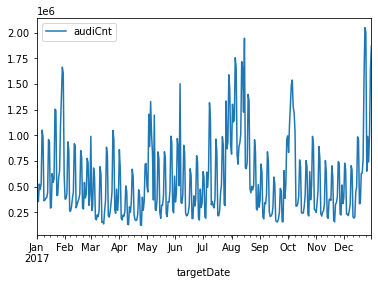

In [ ]:
# 일별 전체 관객수 추이보기
m_df.groupby('targetDate').sum().plot(y = 'audiCnt')

In [ ]:
# 월별로 관객수 추이보기
m_df['targetDate_m'] = m_df.targetDate.dt.strftime('%Y%m')

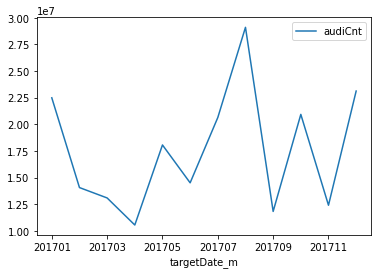

In [ ]:
# 실습하기. 월별로 관갟의 추이를 확인해주세요.
m_df.groupby('targetDate_m').sum().plot(y = 'audiCnt')

In [ ]:
# 상관계수 확인하기
corr_matrix = m_df.corr()
corr_matrix

,rank,movieCd,salesAmt,audiCnt,scrnCnt,showCnt
rank,1.000000,-0.017638,-0.554015,-0.564692,-0.826222,-0.797172
movieCd,-0.017638,1.000000,-0.029153,-0.029062,0.002082,-0.017146
salesAmt,-0.554015,-0.029153,1.000000,0.997113,0.777744,0.799497
audiCnt,-0.564692,-0.029062,0.997113,1.000000,0.790975,0.811998
scrnCnt,-0.826222,0.002082,0.777744,0.790975,1.000000,0.967050
showCnt,-0.797172,-0.017146,0.799497,0.811998,0.967050,1.000000


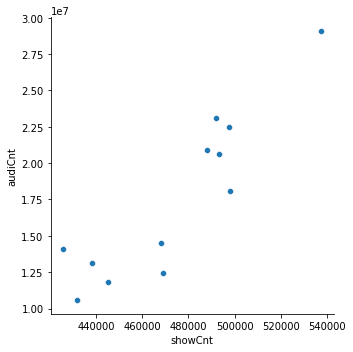

In [ ]:
# 관객수와 상영횟수의 관계
import seaborn as sns
group = m_df.groupby('targetDate_m').sum()
sns.relplot(x = 'showCnt', y = 'audiCnt', data = group)

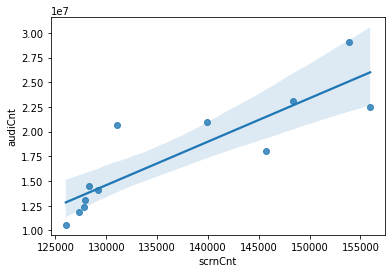

In [ ]:
# 관객수와 스크린수의 관계
sns.regplot(x = 'scrnCnt', y = 'audiCnt', data = group)

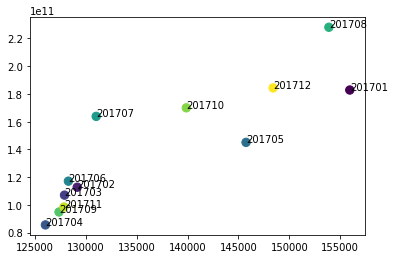

In [ ]:
# 그래프의 모양 바꾸기
from matplotlib import pyplot as plt
tmp = group

y = group.salesAmt # 관객수
x = group.scrnCnt # 스크린수
n = group.index

fig, ax = plt.subplots()
ax.scatter(x, y, s = 70, c = range(len(n)))

for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))

In [ ]:
# 2017년도 상위 관객수 15개로 스크린수와 관객수 분석하기
b = m_df.groupby('movieNm').sum().sort_values('audiCnt', ascending = False)[0:15]

In [ ]:
# 상영횟수 대비 관객수
b.audiCnt / b.showCnt

movieNm
택시운전사          66.585353
신과함께-죄와 벌      93.506227
공조             54.794291
스파이더맨: 홈 커밍    44.137202
범죄도시           46.146216
군함도            60.740832
청년경찰           48.273079
더 킹            49.324137
미녀와 야수         36.580285
킹스맨: 골든 서클     51.655802
토르: 라그나로크      35.387197
강철비            60.111785
꾼              34.233280
남한산성           54.507930
미이라            35.388617
dtype: float64

In [ ]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

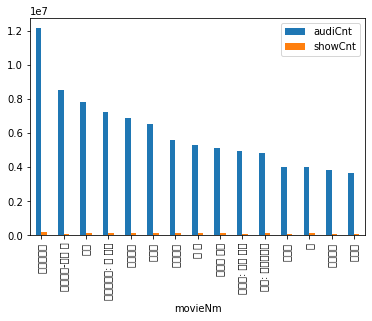

In [ ]:
b.plot.bar(y = ['audiCnt', 'showCnt'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

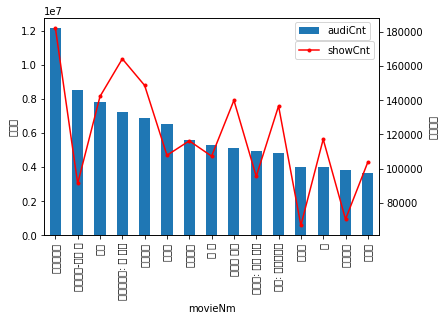

In [ ]:
# twin으로 시각화하기
b.plot.bar(y = 'audiCnt')
plot.ylabel('관객수')
plt.legend(loc = (0.75, 0.9))

plt.twinx()
plt.plot(b.showCnt, 'r.-', label = 'showCnt')
plt.ylabel('상영횟수')
plt.legend(loc = (0.75, 0.81))

### **영화데이터 예측**

In [ ]:
# 상관도 알아보기
b.corr()['audiCnt']

rank        0.336700
movieCd     0.370858
salesAmt    0.998200
audiCnt     1.000000
scrnCnt     0.641522
showCnt     0.651564
Name: audiCnt, dtype: float64

In [ ]:
b

,rank,movieCd,salesAmt,audiCnt,scrnCnt,showCnt
movieNm,,,,,,
택시운전사,207,1189609271,95545284949,12143304,44942,182372
신과함께-죄와 벌,26,282113664,68327061432,8536277,19928,91291
공조,125,826200348,63558111526,7790214,33427,142172
스파이더맨: 홈 커밍,112,726022908,59030018920,7246799,35330,164188
범죄도시,219,1230537262,56143179749,6858989,38952,148636
군함도,115,564521468,50168516368,6545918,25033,107768
청년경찰,162,846822564,44037221416,5610249,27545,116219
더 킹,63,564234412,43262261835,5290359,25226,107257
미녀와 야수,136,988071329,41965874779,5118094,36067,139914


In [ ]:
# 필요없는 rank, movieCd를 지우기
c = b.drop(['rank', 'movieCd'], axis = 1)

In [ ]:
c.corr()['audiCnt']

salesAmt    0.998200
audiCnt     1.000000
scrnCnt     0.641522
showCnt     0.651564
Name: audiCnt, dtype: float64

In [ ]:
# 특성과 정답으로 테이터 나누기
# - 정답(y_data): audiCnt
# - 특성(x_data): audiCnt를 제외한 나머지 특성들

In [ ]:
# 실습하기. 특성과 정답 데이터를 나눠주세요.
x_data = c.drop(['audiCnt'], axis = 1)
y_data = c.audiCnt

In [ ]:
# 학습용과 테스트용으로 데이터 나누기
# 학습용: 75% - 70%
# 테스트용: 25% - 30%

from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.3)

### **회기분석**
- D 차원 벡터 독립 변수와 x와 이에 대응하는 스칼라 종속 변수 y간의 관계를 정량적으로 찾아내는 작업
- 회귀는 연속적인 값을 예측하는 알고리즘

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# 학습히가(패턴찾기)
# - 데이터와 정답을 통해서 패턴
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 모델의 성능평가
from sklearn import metrics
y_predict = model.predict(x_test)
score = metrics.r2_score(y_test, y_predict)
score

0.9721816593601761

In [ ]:
y_test

movieNm
군함도           6545918
청년경찰          5610249
킹스맨: 골든 서클    4930598
강철비           4012642
미이라           3672843
Name: audiCnt, dtype: int64